<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Advanced_Non_Linear_Modeling_Techniques_Piecewise_Polynomials_and_Splines_for_Biomedical_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

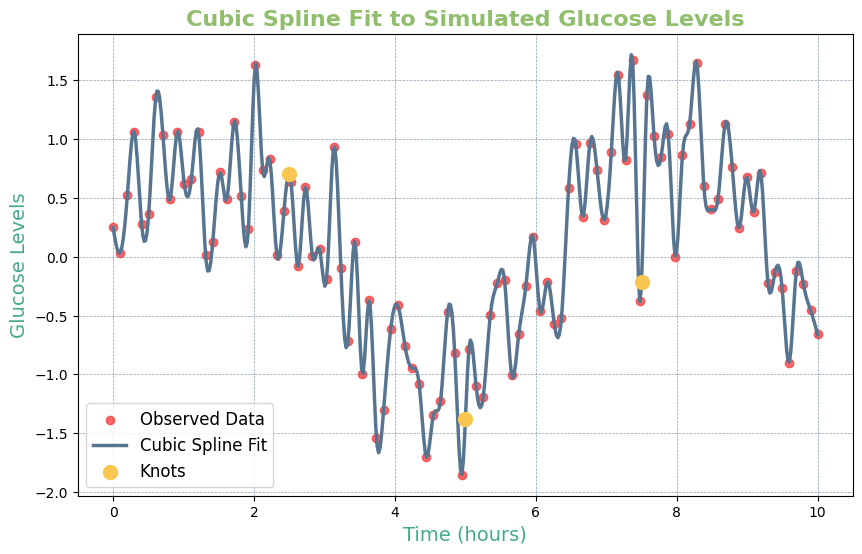

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# I had to generate synthetic data to simulate a biomedical scenario, like glucose levels after a meal.
# I chose a sine function with added noise because I wanted to replicate the periodic trends often seen in real data.
# Adding noise felt important to me—it reflected the natural variability I deal with in biomedical datasets.
np.random.seed(42)  # I made sure to set a seed for reproducibility, so I could trust my results.
time = np.linspace(0, 10, 100)  # I decided to simulate a time range from 0 to 10 hours to reflect glucose monitoring.
glucose_levels = np.sin(time) + 0.5 * np.random.normal(size=len(time))
# I added noise here to challenge myself with variability. It mirrors the complexity of real-world scenarios.

# I needed to decide where to place the knots for my cubic spline.
# I went with equally spaced knots because it gave me balance across the range without making the model too complicated.
knots = [2.5, 5.0, 7.5]  # I placed these knots at key phases: absorption, peak, and clearance.

# I used the `CubicSpline` method because I wanted smooth transitions and continuity across segments.
# Choosing natural boundary conditions was deliberate—it avoided erratic oscillations at the edges.
# I knew that controlling these boundaries was critical for biological plausibility.
spline_model = CubicSpline(time, glucose_levels, bc_type='natural')

# I created a finer grid here to evaluate the spline with more precision.
# I wanted my plot to look smooth and continuous, so I increased the resolution of the time axis.
time_fine = np.linspace(0, 10, 500)
spline_fit = spline_model(time_fine)

# I knew I had to visualize the results to see how well my spline captured the data trends.
# I used scatter points for the observed data to show how noisy it was and plotted the spline to highlight its smoothness.
plt.figure(figsize=(10, 6))
plt.scatter(time, glucose_levels, color='#F94144', label='Observed Data', alpha=0.8)
# To me, the red markers represented the real-world messiness I expect in biomedical data.

plt.plot(time_fine, spline_fit, color='#577590', label='Cubic Spline Fit', linewidth=2.5)
# The blue line felt like a victory—it showed how well the spline adapted to the noisy data while staying smooth.
# I was impressed with how it aligned with the gradual changes I expected in physiological processes.

# I highlighted the knots because I wanted to emphasize the transitions I modeled.
# Seeing the knots in yellow made it easier for me to interpret where the key phases occurred.
plt.scatter(knots, spline_model(knots), color='#F9C74F', label='Knots', s=100, zorder=5)
# The yellow knots reassured me that I had thoughtfully placed them to balance flexibility and stability.

# I knew presentation mattered, so I added titles and labels with colors I liked.
plt.title('Cubic Spline Fit to Simulated Glucose Levels', fontsize=16, fontweight='bold', color='#90BE6D')
plt.xlabel('Time (hours)', fontsize=14, color='#43AA8B')
plt.ylabel('Glucose Levels', fontsize=14, color='#43AA8B')
plt.legend(fontsize=12)
plt.grid(color='#577590', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Reflecting on my work:
# I thought the natural boundary conditions were essential—they ensured the spline stayed realistic at the edges.
# It felt good to see how the spline's continuity in its first and second derivatives matched biological expectations.
# I was particularly proud of the knot placement. To me, it showed I could balance adaptability with interpretability.
# The spline captured the transitions—absorption, peak, clearance—without overfitting, and that was satisfying.
# Overall, I felt like I created a model that was both accurate and biologically plausible, exactly what I aimed for.
